In [1]:
%matplotlib inline

import numpy as np                               # General math operations
import scipy.io as sio                           # Loads .mat variables
import matplotlib.pyplot as plt                  # Data visualization
from sklearn.linear_model import Perceptron      # Perceptron toolbox
from sklearn.neural_network import MLPRegressor  # MLP toolbox
from sklearn import preprocessing                # Data preprocessing

<h4>Multi-layer perceptron with backpropagation</h4>

The code below tests the formation of a multi layer perceptron with backpropogation using the scikit-learn Python library.

The MLP is initially formed using one hidden layer of 50 neurons, a logistic sigmoid activation function, and a total of 500 iterations.  Once it is trained, the MLP is used to predict the results of both the training cases and new test cases.  As a measure of accuracy, the root mean square error (RMSE) is displayed after inputting data to the MLP.


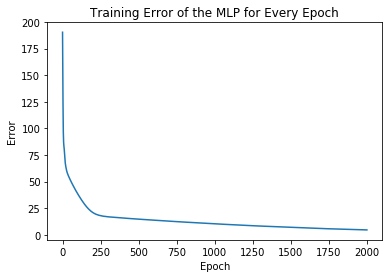

Training RMSE: 1.40733567213 MJ/m^2
Test RMSE: 3.77211115817 MJ/m^2


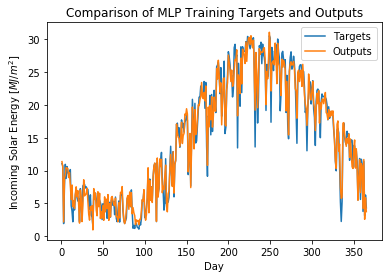

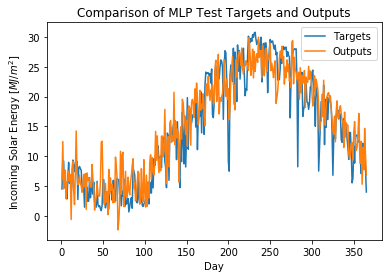

In [6]:
# Obtain training data
moxeeData = sio.loadmat('moxeetrainingdata.mat')    # Load variables from the Moxee dataset
trainingInputs = moxeeData['pressureData']          # Pressure values and differences for every hour in a year
trainingTargets = moxeeData['dataEstimate']         # Estimate of incoming solar energy based on observed data

# Preprocess the training inputs and targets
iScaler = preprocessing.StandardScaler()    # Scaler that removes the mean and scales to unit variance
scaledTrainingInputs = iScaler.fit_transform(trainingInputs)   # Fit and scale the training inputs

tScaler = preprocessing.StandardScaler()
scaledTrainingTargets = tScaler.fit_transform(trainingTargets)

# Create the multilayer perceptron
mlp = MLPRegressor(
    hidden_layer_sizes = (50,),     # One hidden layer with 50 neurons
    activation = 'logistic',        # Logistic sigmoid activation function
    solver = 'sgd',                 # Gradient descent
    learning_rate_init = 0.01       # Initial learning rate
    )


noIterations = 2000 # Number of iterations (epochs) for which the MLP trains


trainingError = np.zeros(noIterations)  # Initialize array to hold training error values

# Train the MLP for the specified number of iterations
for i in range(noIterations):
    mlp.partial_fit(scaledTrainingInputs, np.ravel(scaledTrainingTargets))  # Partial fit is used to obtain the output values after each epoch
    currentOutputs = mlp.predict(scaledTrainingInputs)  # Obtain the outputs for the current MLP using the training inputs
    trainingError[i] = np.sum((scaledTrainingTargets.T - currentOutputs) ** 2) / 2  # Keep track of the error throughout the number of epochs

# Plot the error curve
plt.plot(range(noIterations), trainingError)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error of the MLP for Every Epoch')
plt.show()

# Obtain test data
testdataset = sio.loadmat('moxeetestdata.mat')
testInputs = testdataset['testInputs']
testTargets = testdataset['testTargets']
scaledTestInputs = iScaler.transform(testInputs)  # Scale the test inputs

# Predict incoming solar energy from the training data and the test cases
scaledTrainingOutputs = mlp.predict(scaledTrainingInputs)
scaledTestOutputs = mlp.predict(scaledTestInputs)

# Transform the outputs back to the original values
trainingOutputs = tScaler.inverse_transform(scaledTrainingOutputs)
testOutputs = tScaler.inverse_transform(scaledTestOutputs)

# Calculate and display training and test root mean square error (RMSE)
trainingRMSE = np.sqrt(np.sum((trainingOutputs - trainingTargets[:, 0]) ** 2) / len(trainingOutputs)) / 1000000  # Divide by 1e6 for MJ/m^2
testRMSE = np.sqrt(np.sum((testOutputs - testTargets[:, 0]) ** 2) / len(testOutputs)) / 1000000
print("Training RMSE:", trainingRMSE, "MJ/m^2")
print("Test RMSE:", testRMSE, "MJ/m^2")

day = np.array(range(1, len(testTargets) + 1))

# Plot training targets vs. training outputs
trainingTargetHandle ,= plt.plot(day, trainingTargets / 1000000, label = 'Targets')
trainingOutputHandle ,= plt.plot(day, trainingOutputs / 1000000, label = 'Outputs')
plt.xlabel('Day')
plt.ylabel(r'Incoming Solar Energy [$MJ / m^2$]')
plt.title('Comparison of MLP Training Targets and Outputs')
plt.legend(handles = [trainingTargetHandle, trainingOutputHandle])
plt.show()

# Plot test targets vs. test outputs
testTargetHandle ,= plt.plot(day, testTargets / 1000000, label = 'Targets')
testOutputHandle ,= plt.plot(day, testOutputs / 1000000, label = 'Outputs')
plt.xlabel('Day')
plt.ylabel(r'Incoming Solar Energy [$MJ / m^2$]')
plt.title('Comparison of MLP Test Targets and Outputs')
plt.legend(handles = [testTargetHandle, testOutputHandle])
plt.show()